<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>

<h1Business Problem:>

**Business Problem:** AtliQo Bank plans to launch a new credit card targeting customers aged 18–25, but lacks data-driven insights into their spending behavior, transaction patterns, credit profiles, income levels, repayment capacity, and digital engagement preferences. This project aims to analyze customer transaction and credit data to identify a profitable, low-risk target segment and design an optimized launch strategy for the new credit card.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

***==>1. Data Importing And Data Exporation***

In [2]:
df_cust = pd.read_csv('datasets/customers.csv')
df_cs = pd.read_csv('datasets/credit_profiles.csv')
df_trans = pd.read_csv('datasets/transactions.csv')

<h1 style="color:purple" align="center" >Explore Customers Table<h1>

In [3]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [4]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


<h2 style="color:Blue">1. Analyze Income Column<h2>

### Handling Null Values


In [5]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [6]:
df_cust[df_cust.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married


In [7]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [8]:
df_cust["annual_income"] = df_cust.apply(
    lambda row: occupation_wise_inc_median[row['occupation']] if pd.isnull(row["annual_income"]) else row["annual_income"],
    axis=1
)

In [9]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

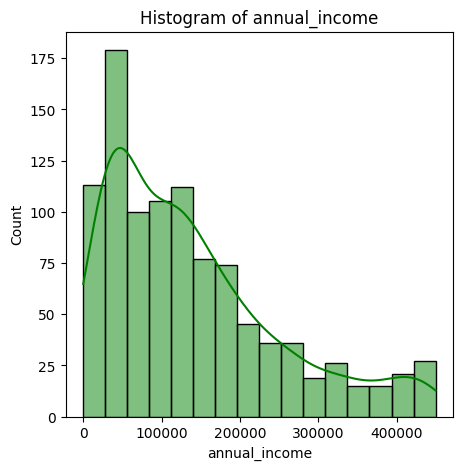

In [10]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [11]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


### Outlier Treatment: Annual income


In [12]:
for index, row in df_cust.iterrows():
    if row["annual_income"] < 100:
        occupation = df_cust.at[index, "occupation"]
        df_cust.at[index, "annual_income"] = occupation_wise_inc_median[occupation]        

In [13]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [14]:
avg_income_per_occupation  = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation 

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

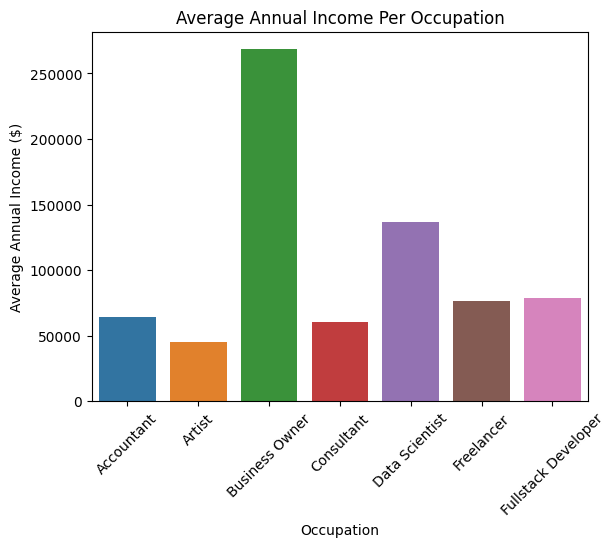

In [15]:
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values, palette="tab10")

plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

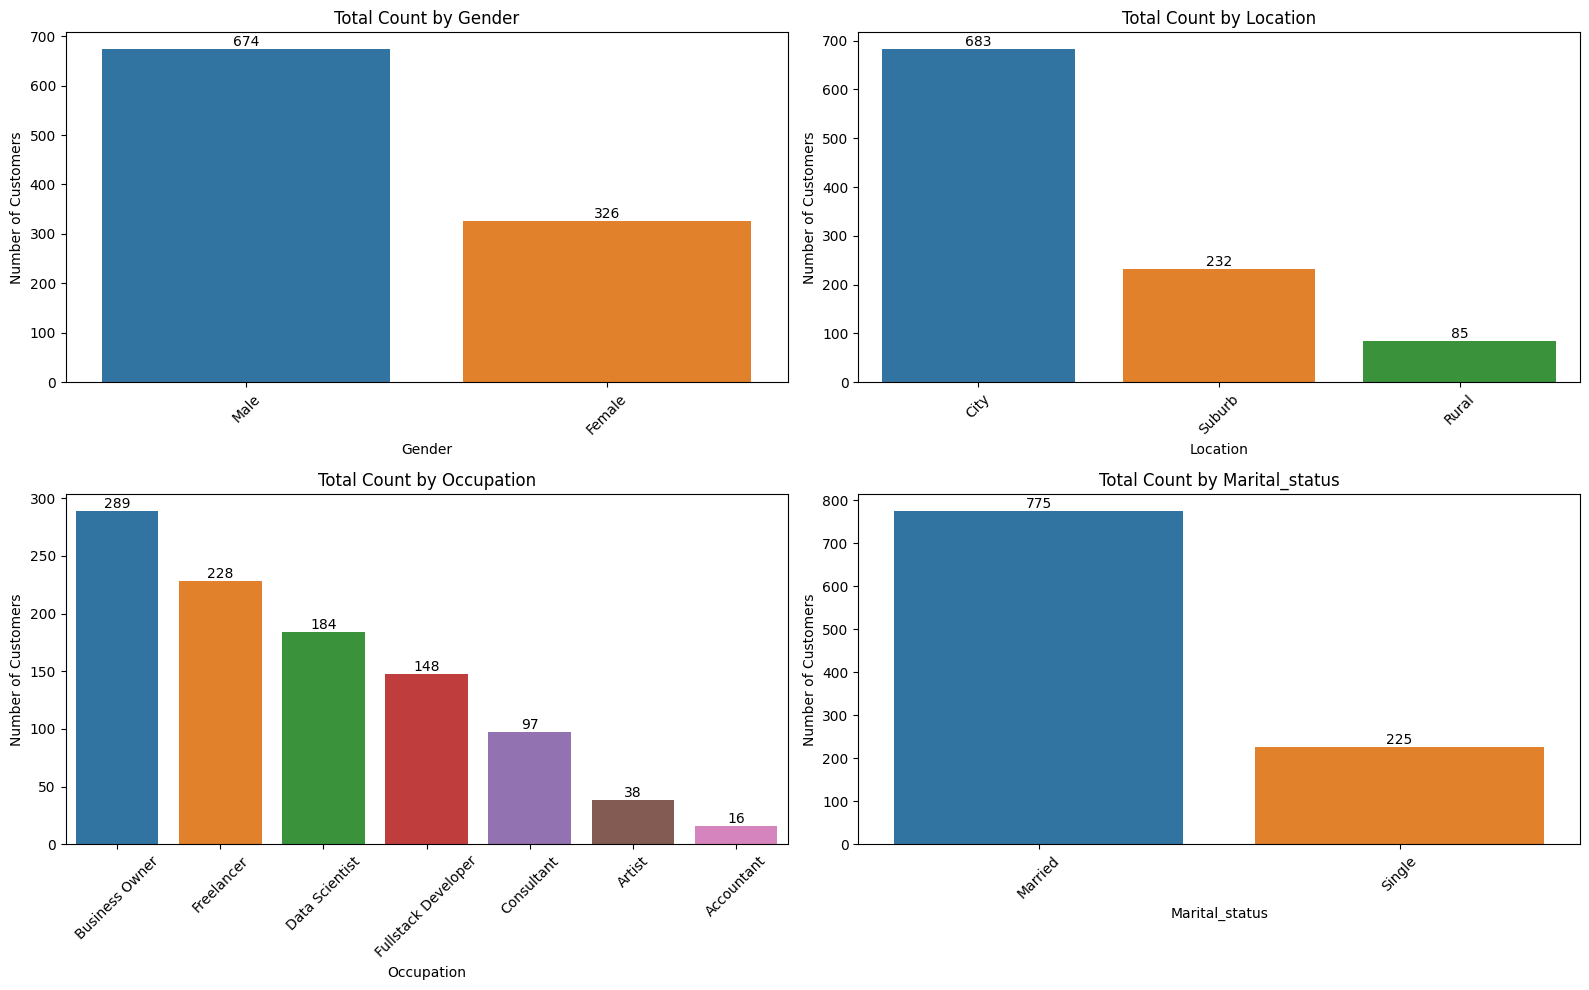

In [16]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    
    total_count = df_cust[col].value_counts()
    
    sns.barplot(
        x=total_count.index,
        y=total_count.values,
        ax=axes[i],
        palette='tab10'
    )
    
    axes[i].set_title(f'Total Count by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of Customers')
    axes[i].tick_params(axis='x', rotation=45)

    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()


<h2 style="color:Blue">2. Analyze Age Column<h2>

In [17]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [18]:
df_cust.age.isnull().sum()

np.int64(0)

In [19]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [20]:
min_age = df_cust.age.min()
max_age = df_cust.age.max()

min_age, max_age

(np.int64(1), np.int64(135))

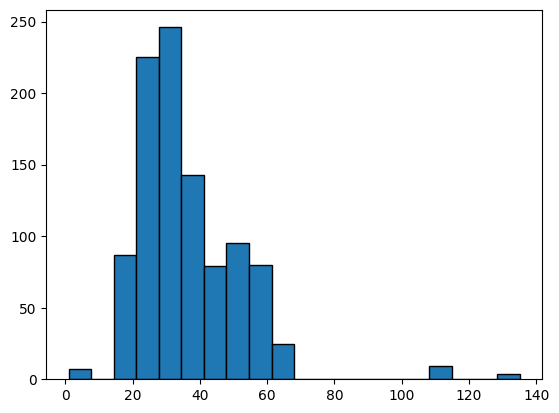

In [21]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.show()

In [22]:
outliers = df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Amaira Dewan,Male,110,City,Consultant,96522.0,Single
295,296,Veer Anand,Male,1,Rural,Accountant,55254.0,Married
325,326,Yash Chatterjee,Male,110,City,Accountant,61021.0,Single
610,611,Advait Mangal,Male,135,Rural,Business Owner,444776.0,Married
692,693,Aarohi Dubey,Male,1,City,Business Owner,83045.0,Married


In [23]:
outliers.shape

(20, 8)

In [24]:
median_age_per_occupation = df_cust.groupby("occupation")["age"].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [25]:
for index, row in outliers.iterrows():
    df_cust.at[index, 'age'] = median_age_per_occupation[row['occupation']]


In [26]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [27]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


In [28]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married


In [29]:
bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25' , '26-48' , '49-65']

df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [30]:
age_group_counts = df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

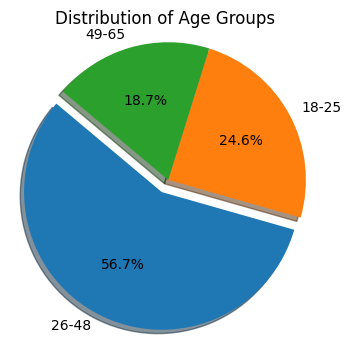

In [31]:
age_group_counts = df_cust['age_group'].value_counts(normalize=True) * 100

plt.figure(figsize=(4, 4))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

##### More than 50% of customer base are in in age group of 26 - 48 adn ~26% are of age group 18 - 25

<h2 style="color:Blue">3. Analyze Gender and Location Distribution<h2>

In [32]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [33]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [34]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [35]:
customer_location_gender = df_cust.groupby(['location','gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


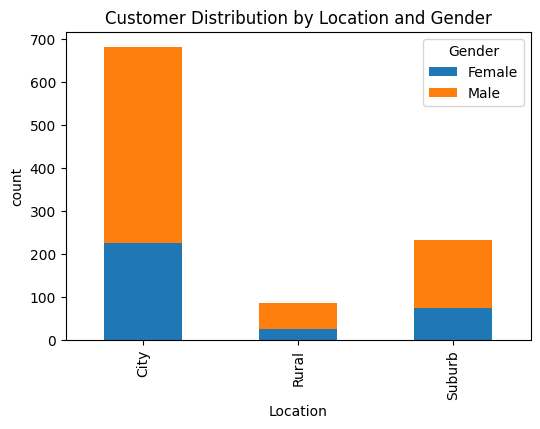

In [36]:
customer_location_gender.plot(kind='bar', stacked=True, figsize=(6,4))

plt.title('Customer Distribution by Location and Gender')

plt.legend(title='Gender')

plt.xlabel('Location')
plt.ylabel('count')
plt.show()

<h1 style="color:purple" align="center">Explore Credit Score Table<h1>

In [37]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


### Data Cleaning Step 1: Remove Duplicates 

In [38]:
df_cs.shape

(1004, 6)

In [39]:
df_cs['cust_id'].nunique()

1000

In [40]:
a = df_cs[df_cs['cust_id'].duplicated(keep=False)]
a

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [41]:
df_cs_clean_1 = df_cs.drop_duplicates(subset="cust_id", keep="last")
df_cs_clean_1.shape

(1000, 6)

### Data Cleaning Step 2: Handle Null Values

In [42]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [43]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [44]:
df_cs_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

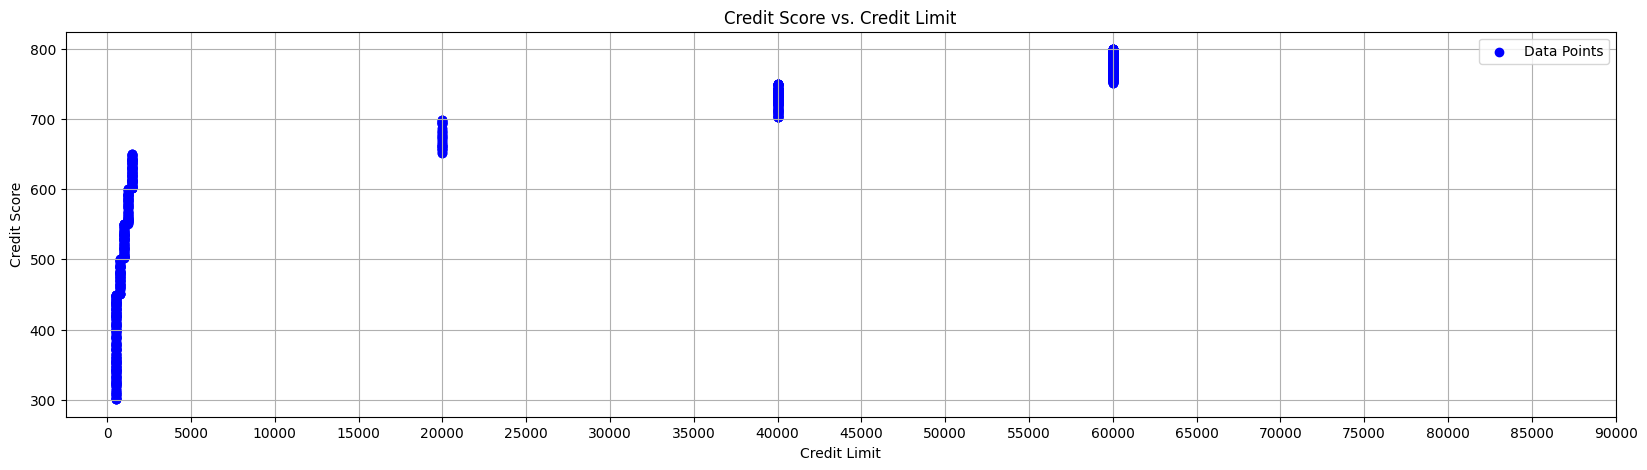

In [45]:
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_clean_1['credit_limit'], df_cs_clean_1['credit_score'], c='blue', marker='o', label='Data Points')

plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

plt.xticks(range(0, 90001, 5000))
plt.grid(True)

plt.legend()
plt.show()

In [46]:
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [47]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


We can now see a new column called credit_score_range whcih is calculated based on the credit_score column

In [48]:
df_cs_clean_1[df_cs_clean_1['credit_score_range']=="750-799"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
21,22,785,0.897089,36083.0,3.0,60000.0,750-799
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
26,27,766,0.830908,31344.0,3.0,60000.0,750-799
29,30,798,0.222597,7238.0,2.0,60000.0,750-799
31,32,768,0.747793,35109.0,2.0,60000.0,750-799
...,...,...,...,...,...,...,...
988,985,770,0.628088,33405.0,2.0,60000.0,750-799
993,990,772,0.259958,11937.0,2.0,60000.0,750-799
996,993,782,0.477170,20305.0,2.0,60000.0,750-799
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799


In [49]:
df_cs_clean_1[df_cs_clean_1['credit_score_range']=="300-449"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449
...,...,...,...,...,...,...,...
981,978,371,0.435307,183.0,2.0,500.0,300-449
982,979,332,0.150815,65.0,1.0,500.0,300-449
984,981,327,0.377202,108.0,3.0,500.0,300-449
989,986,425,0.178470,56.0,4.0,500.0,300-449


Above you can see that for credit score range "750-799" the credit limit is 60K whereas for "300-449" it is 500.

In [50]:
mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [51]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
948,945,526,0.272734,227.0,1.0,NaN,500-549
167,168,737,0.489797,12421.0,2.0,NaN,700-749
306,307,304,0.254547,74.0,4.0,NaN,300-449


In [52]:
df_cs_clean_2 = pd.merge(df_cs_clean_1,mode_df, on="credit_score_range", suffixes=("","_mode"))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
79,80,790,0.355074,13210.0,4.0,60000.0,750-799,60000.0
580,581,482,0.400596,202.0,4.0,750.0,450-499,750.0
604,605,479,0.296771,192.0,3.0,750.0,450-499,750.0


In [53]:
df_cs_clean_2[df_cs_clean_2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
351,352,736,0.367879,9916.0,2.0,NaN,700-749,40000.0
211,212,337,0.608700,226.0,4.0,NaN,300-449,500.0
414,415,646,0.503281,533.0,3.0,NaN,600-649,1500.0


In [54]:
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace=True)
df_cs_clean_3.shape

(1000, 8)

In [55]:
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

You can now see ZERO outliers in credit_limit column which means we successfully got rid of all NULL values. 

### Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [56]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


When we observe min and max for various columns, we realize that outstanding_debt's max is greater than the max of credit_limit. Based on the business understanding, we know that the maximum debt that a customer can have is equal to credit limit. They would not be allowed to spend more than their credit limit. Let's see how many such cases are present in our dataset

**Visualizing outliers**

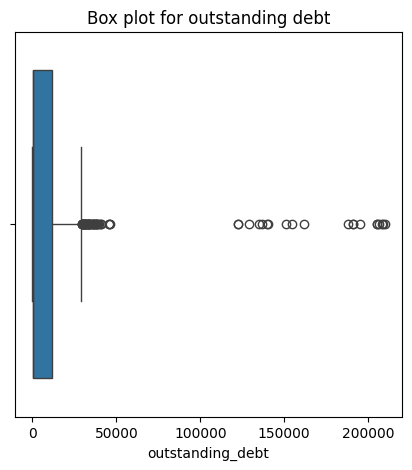

In [57]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df_cs_clean_3['outstanding_debt'])
plt.title('Box plot for outstanding debt')
plt.show()

Instead of using any statistical approach (such as standard deviation or IQR), here too we will use a business knowledge. We will mark any outstanding debt that is greater than credit limit as an outlier

In [58]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [59]:
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [60]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


All outliers in column outstanding_debt are now GONE. 

In [61]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000,60000.000000


### Data Exploration: Visualizing Correlation in Credit Score Table

In [62]:
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48


In [63]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [64]:
df_merged = df_cust.merge(df_cs_clean_3, on="cust_id", how="inner")
df_merged.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0


In [65]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


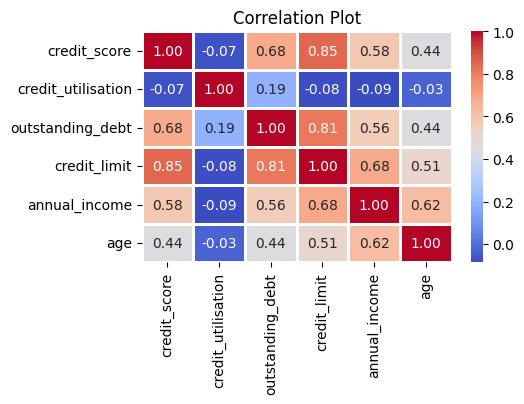

In [66]:
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()

You can see a high correlation between credit limit and credit score (~0.85)

Also credit limit and annual income has a high correlation.


<h1 style="color:purple" align="center">Transactions Table<h1>

In [67]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [68]:
df_trans.shape

(500000, 7)

### Data Cleaning Step 1: Handle NULL Values: platform column

In [69]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [70]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


<Axes: xlabel='count', ylabel='product_category'>

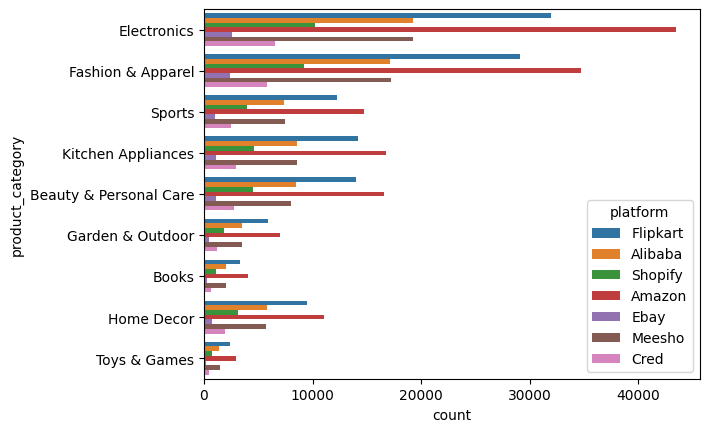

In [71]:
sns.countplot(y='product_category', hue='platform', data=df_trans)

In the above chart, you can see that in all product categories Amazon is the platform that is used the most for making purchases. For handling null values in platform may be we can just replace them using "Amazon" as a product platform just because it is used most frequently

In [72]:
df_trans.platform.mode()[0]

'Amazon'

In [73]:
df_trans.platform.fillna(df_trans.platform.mode()[0], inplace=True)

In [74]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

Once again we got rid of NULL values.

### Data Cleaning Step 2: Treat Outliers: tran_amount

In [75]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We can see transactions with 0 amount. These seem to be invalid

In [76]:
df_trans_zero = df_trans[df_trans.tran_amount==0]
df_trans_zero.shape

(4734, 7)

In [77]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [78]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [79]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values.

In [80]:
df_trans_1 = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [81]:
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

np.float64(554.0)

In [82]:
df_trans['tran_amount'].replace(0,median_to_replace, inplace=True)

In [83]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


As you can see above, no zero values are left in tran_amount column

In [84]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

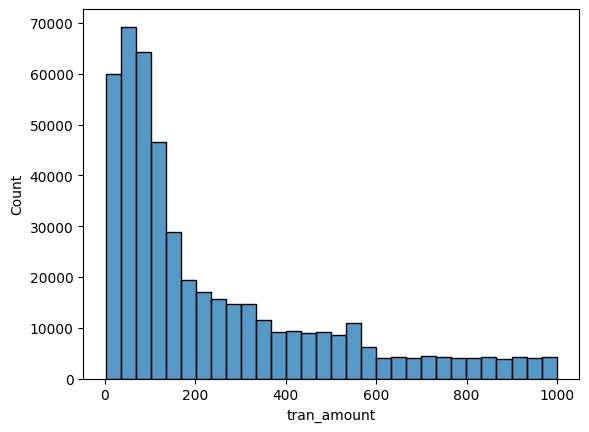

In [85]:
sns.histplot(df_trans[df_trans.tran_amount<1000].tran_amount, bins=30)

In [86]:
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [87]:
df_trans[df_trans.tran_amount<upper].tran_amount.max()

np.int64(999)

In [88]:
df_trans[df_trans.tran_amount>upper].tran_amount.min()

np.int64(50000)

In [89]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [90]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [91]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [92]:
df_trans_outliers.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [93]:
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [94]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


You can now see that we got rid of outliers from tran_amount column.

In [95]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='tran_amount', ylabel='Count'>

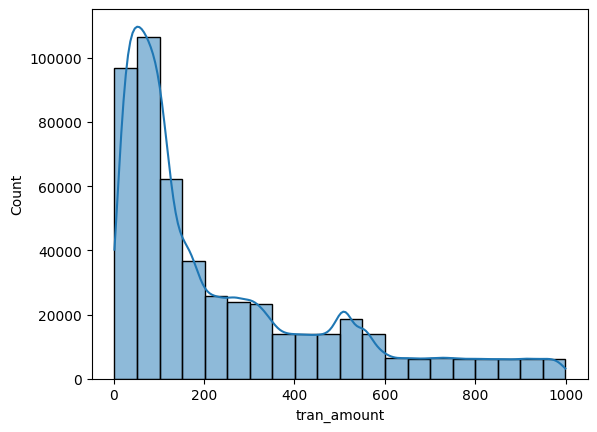

In [96]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

Above shows the histogram of transactions after the removal of outliers. You can see that distribution is right skewed. Transaction amount now is less than 1000

### Data Visualization: Payment Type Distribution

In [97]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

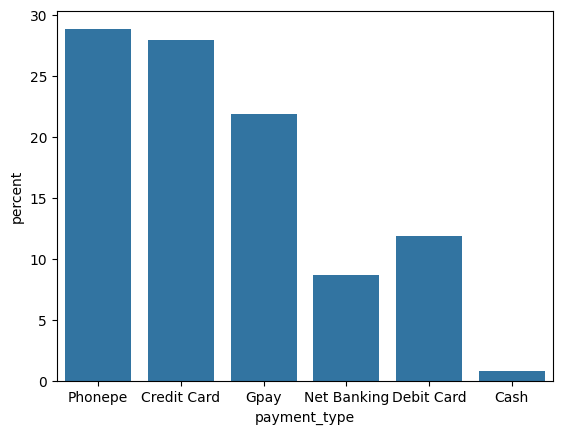

In [98]:
sns.countplot(x=df_trans.payment_type , stat='percent')

**Distribution of payment types across age groups**

In [99]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [100]:
df_merged.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0


In [101]:
df_merged_2 = pd.merge(df_merged, df_trans, on="cust_id", how='inner')
df_merged_2.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card


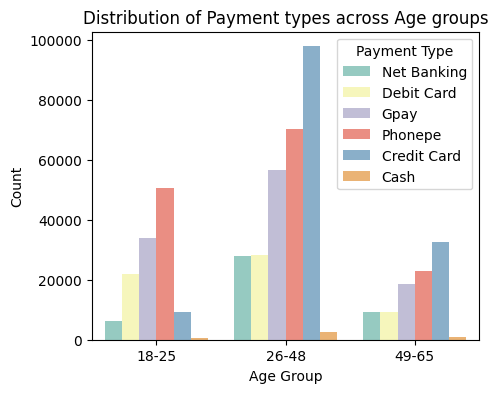

In [102]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

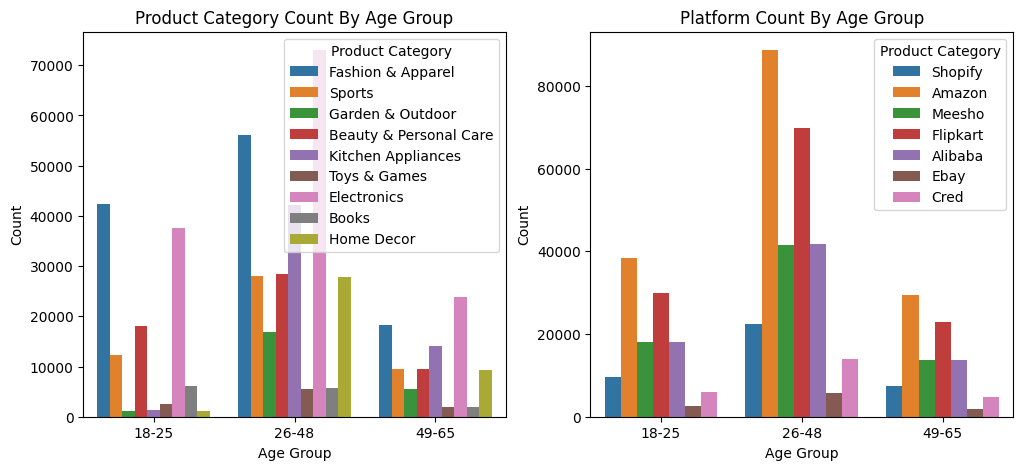

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Data Visualization: Average Transaction Amount

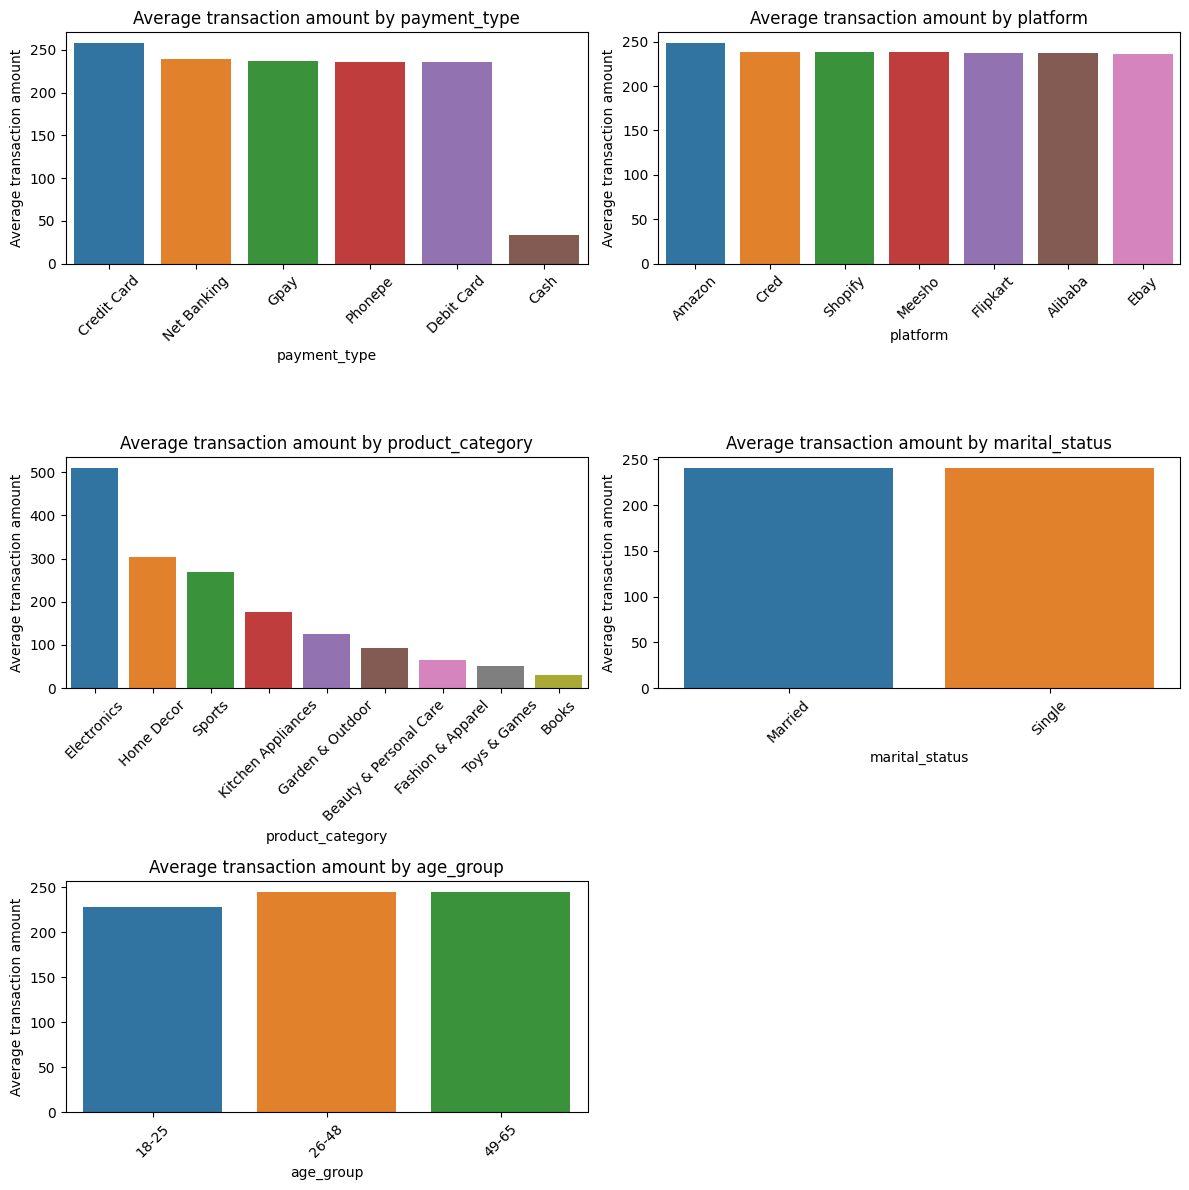

In [104]:
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, cat_col in enumerate(cat_cols):
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

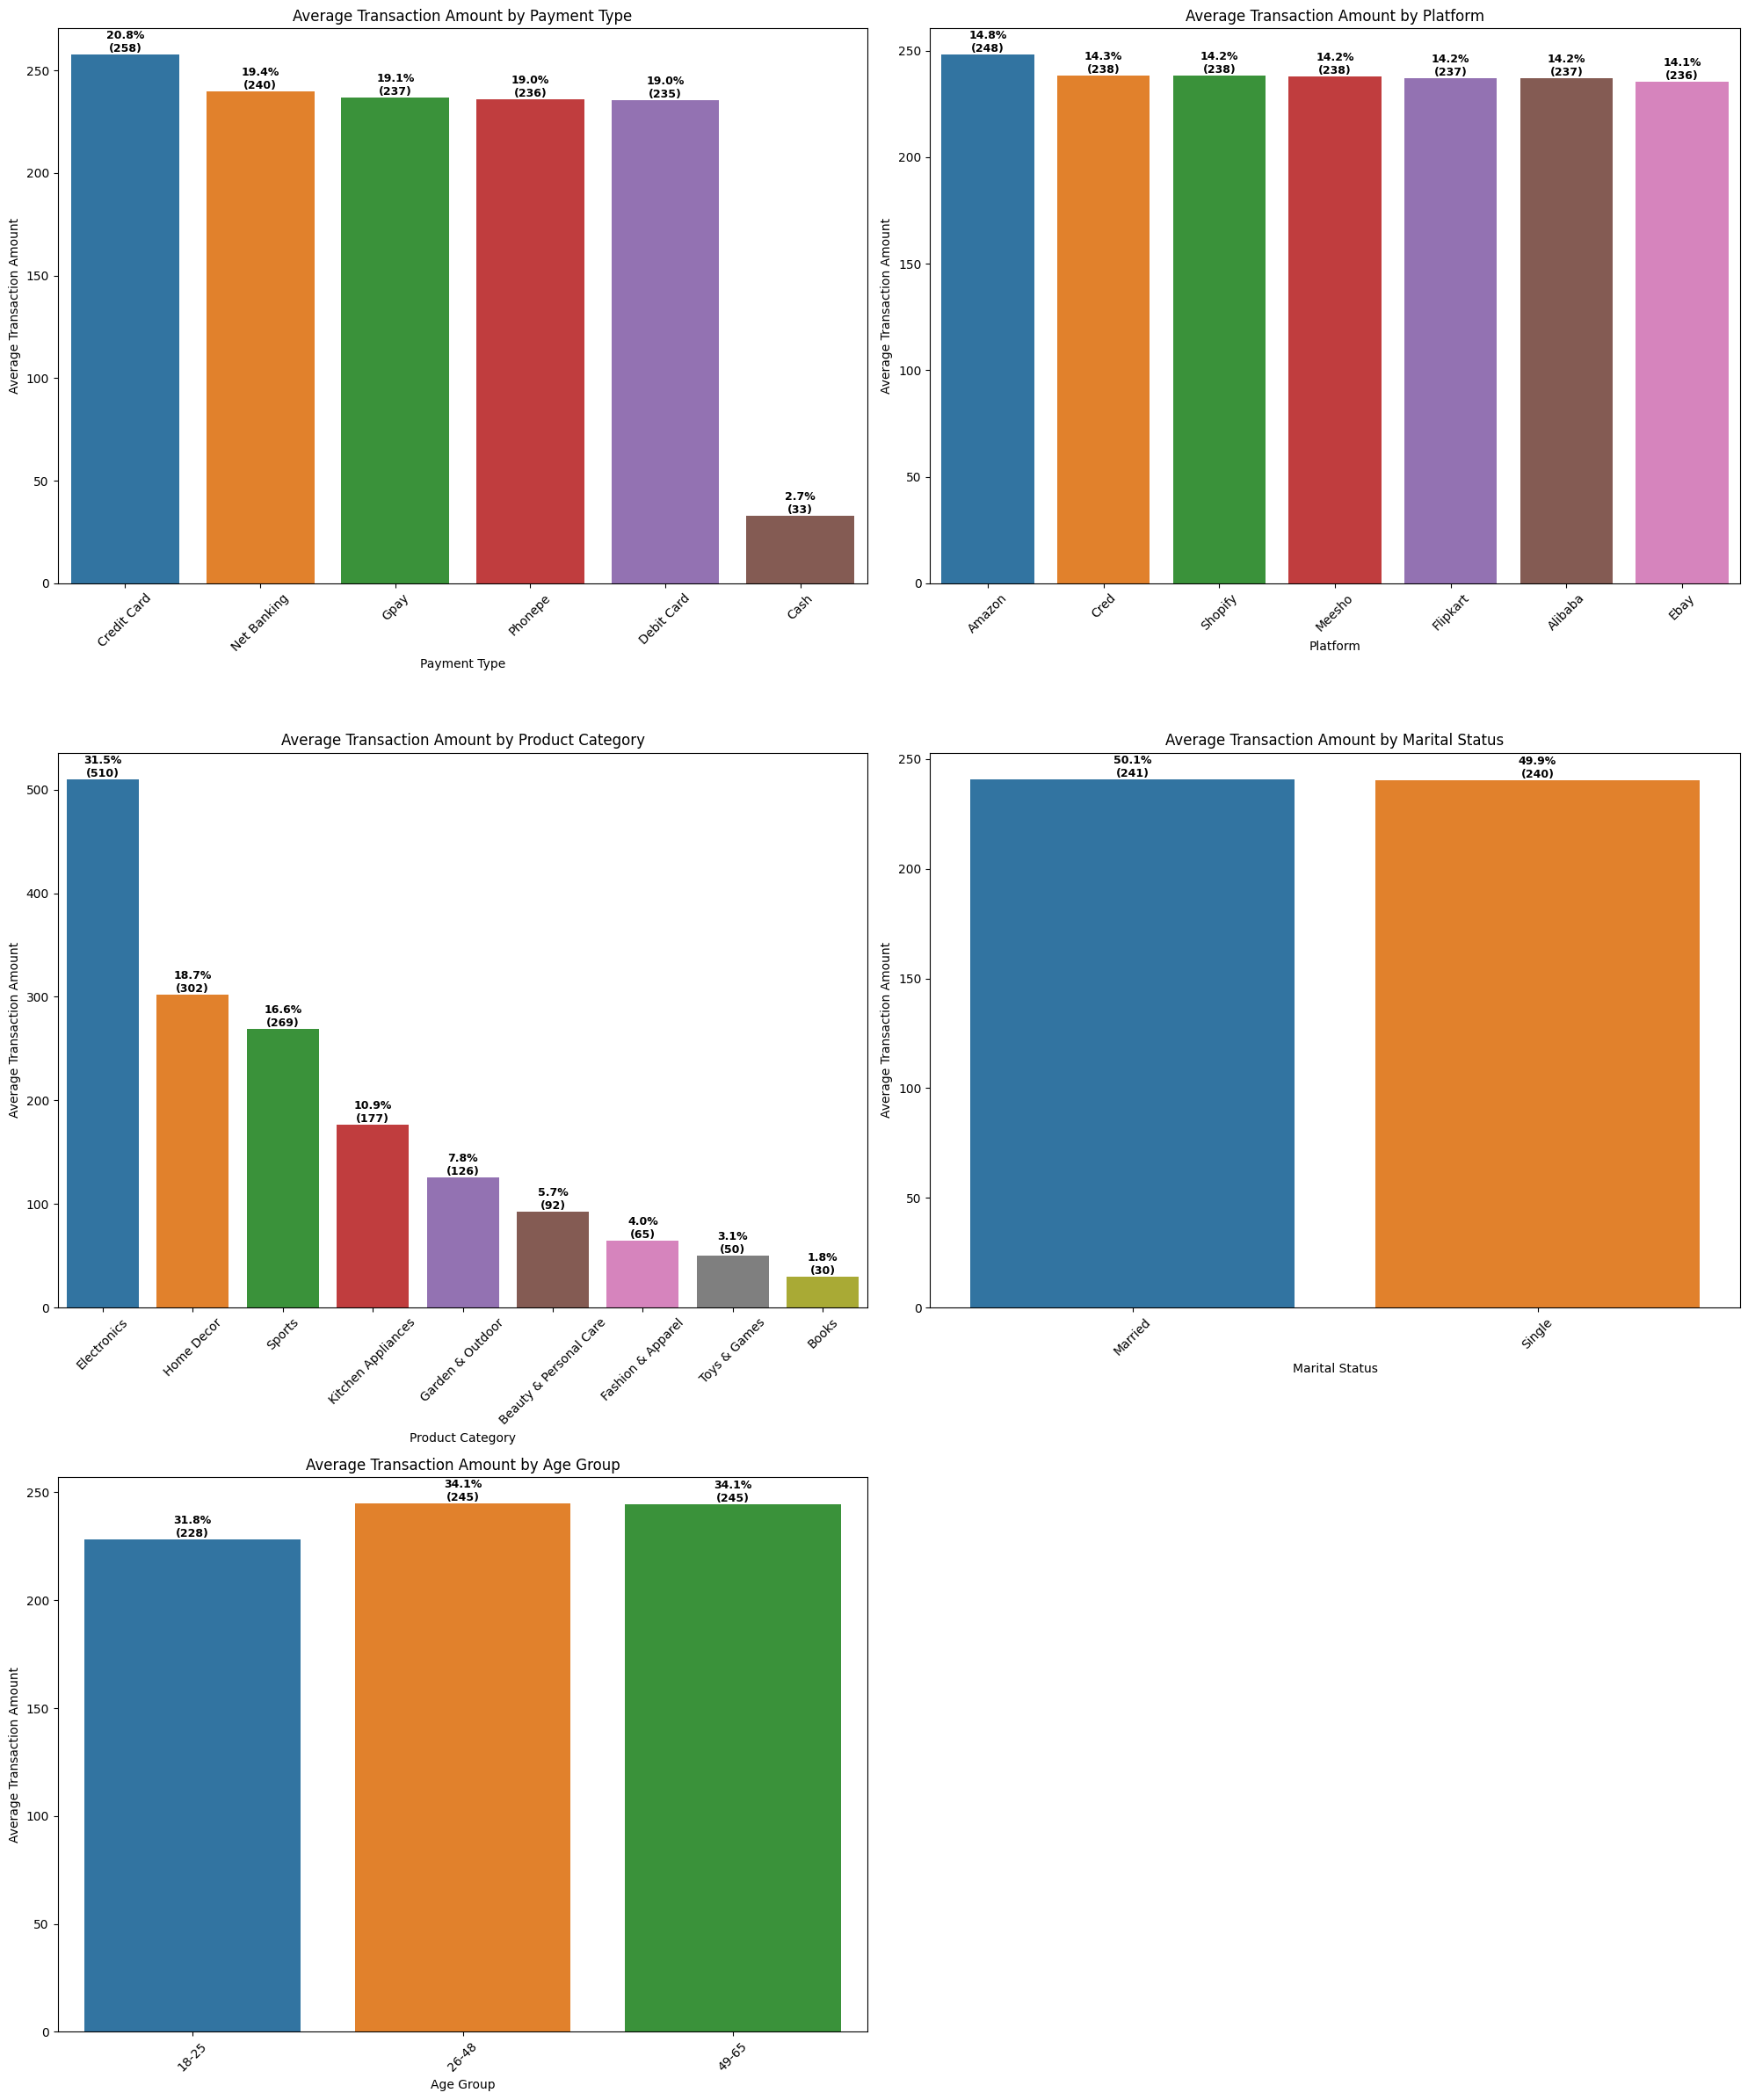

In [105]:
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']
num_rows = 3
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 8 * num_rows))
axes = axes.flatten()

for i, cat_col in enumerate(cat_cols):
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    
    # Add percentage labels
    total = sorted_data['tran_amount'].sum()
    for p in axes[i].patches:
        value = p.get_height()
        percentage = f"{100 * value / total:.1f}%"
        axes[i].annotate(
            f"{percentage}\n({value:,.0f})",   # shows both % and actual value
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center", va="bottom",
            fontsize=9, fontweight="bold", color="black"
        )
    
    axes[i].set_title(f'Average Transaction Amount by {cat_col.replace("_", " ").title()}')
    axes[i].set_xlabel(cat_col.replace("_", " ").title())
    axes[i].set_ylabel('Average Transaction Amount')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [106]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711635,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [107]:
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


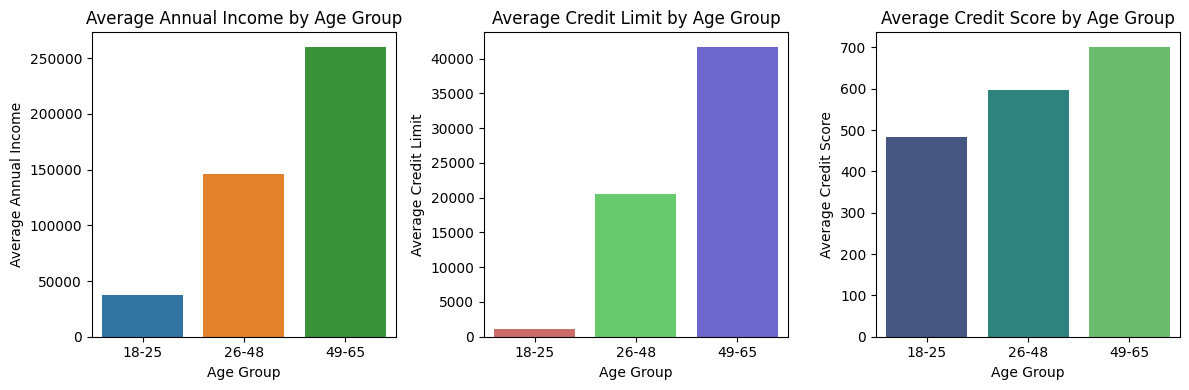

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care

In [109]:
!pip freeze > requirements.txt
